In [1]:
# importing necessary pacakges

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from keras.utils import to_categorical

C:\Users\MOHAN KUMAR SAH\.conda\envs\python3.5\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df_train=pd.read_csv("mnist_train.csv")
df_train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(60000, 785)

In [5]:
x_train=df_train.drop("label",axis=1)
y_train=df_train["label"]
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [6]:
df_test=pd.read_csv("mnist_test.csv")
df_test.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.shape

(10000, 785)

In [8]:
x_test=df_test.drop("label",axis=1)
y_test=df_test["label"]
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [9]:
# one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# create model
model = Sequential()     # defining a simple multilayer Perceptron model

# This line adds the input layer and one hidden layer to our neural network
model.add(Dense(units=12, input_dim=784, activation='relu', kernel_initializer='uniform'))

# The line creates and adds another hidden layer to the model with 8 nodes and ‘rectifier’ activation function and uniform distribution of weights.
# More layers can be added depending on the problem and its complexity.
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))

# 10 is the number of nodes in the output layer. Here we have a single output layer.
# Sigmoid or softmax are the commonly used activation functions for an output layer.
model.add(Dense(units=10, activation='sigmoid', kernel_initializer='uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                9420      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
Total params: 9,614
Trainable params: 9,614
Non-trainable params: 0
_________________________________________________________________


The summary is textual and includes information about:

1. The layers and their order in the model.
2. The output shape of each layer.
3. The number of parameters (weights) in each layer.
4. The total number of parameters (weights) in the model.

1. Dense(): lets us create a densely connected neural network
2. input_dim : shape or number of nodes in the input layer
3. units : the number of neurons or nodes in the current layer (hidden layer)
4. activation : the activation function applied to each node.”relu” stands for Rectified Linear Unit
5. kernel_initializer: initial random weights of the layer

In [11]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The ANN needs to be compiled with an optimizer function and a loss function before being trained.

Optimizer: an optimizer function for the network, There are several types of optimizers and the choice depends on the nature of the problem

Loss: used for calculating the losses and errors.There are several types and the choice depends on the nature of the problem.

Metrics: the metric used to measure the accuracy of the model.Types of metrics.

In [12]:
# Fit the model
model.fit(x_train, y_train, epochs=5, batch_size=10)

Epoch 1/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.0848 - acc: 0.9713
Epoch 2/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.0567 - acc: 0.9820
Epoch 3/5
60000/60000 [==============================] - 11s 177us/step - loss: 0.0529 - acc: 0.9832
Epoch 4/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.0510 - acc: 0.9840
Epoch 5/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.0493 - acc: 0.9845


x_train: The training data consisting of only the independent factors

y_train: The training data consisting of only the dependent factors

Batch_size: the weight is updated after training each batch of samples

epochs: one epoch stands for one complete training of the neural network with all samples.

In [13]:
# Evaluating the performance on the test set

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ",test_loss.round(3),"\nAccu: ",test_acc.round(3))

10000/10000 [==============================] - 0s 37us/step
Loss:  0.054 
Accu:  0.983


In [14]:
#show predictions for the first 3 images in the test set
preds=model.predict(x_test[:4])
preds

array([[4.19134699e-10, 9.00026818e-04, 1.13013564e-04, 1.24342330e-02,
        1.70730971e-07, 5.98614991e-10, 5.30464151e-24, 9.91269112e-01,
        7.21563704e-21, 1.31749536e-03],
       [4.25169965e-05, 1.05051638e-03, 9.97644126e-01, 1.18871313e-02,
        9.22977463e-08, 6.94280956e-04, 1.17801432e-03, 2.81407498e-03,
        6.91950409e-05, 1.29752320e-09],
       [1.50320575e-05, 9.88891244e-01, 4.37959563e-03, 6.99297944e-03,
        3.04533960e-03, 1.00583573e-04, 8.29424825e-04, 4.82107978e-03,
        1.26024876e-02, 1.50235268e-04],
       [9.99875546e-01, 2.35826075e-32, 1.70814310e-04, 2.60264846e-04,
        4.31313265e-06, 1.84424076e-04, 1.19075982e-03, 4.41919568e-08,
        9.87942670e-08, 2.15101845e-05]], dtype=float32)

In [15]:
np.argmax(preds, axis=-1)

array([7, 2, 1, 0], dtype=int64)

In [16]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
np.argmax(y_test[:4], axis=-1)

array([7, 2, 1, 0], dtype=int64)

# Visualize Model

The code below shows how we can iterate through the model layers and see the configuration

In [18]:
model.layers

In [19]:
for layer in model.layers:
    print(layer.name, layer.trainable)

dense_1 True
dense_2 True
dense_3 True


In [20]:
for layer in model.layers:
    print('Layer Configuration:')
    #print(layer.get_config(), end='\n{}\n'.format('----'*10))
    print(layer.get_config(),"\n","------"*20)

Layer Configuration:
{'units': 12, 'bias_regularizer': None, 'activation': 'relu', 'kernel_constraint': None, 'kernel_regularizer': None, 'activity_regularizer': None, 'trainable': True, 'dtype': 'float32', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomUniform', 'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}}, 'name': 'dense_1', 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'bias_constraint': None, 'batch_input_shape': (None, 784)} 
 ------------------------------------------------------------------------------------------------------------------------
Layer Configuration:
{'units': 8, 'bias_regularizer': None, 'activation': 'relu', 'activity_regularizer': None, 'kernel_regularizer': None, 'kernel_constraint': None, 'trainable': True, 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomUniform', 'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'bias_constraint': None,

The weights of each layer can be obtained using

In [39]:
for i in range(len(model.layers)):
    print("For Layer ",model.layers[i].name," weights are")
    print(model.layers[i].get_weights())
    print()
    print(len(model.layers[i].get_weights()[0]),"  ",len(model.layers[i].get_weights()[1]))
    print("----"*30)

For Layer  dense_1  weights are
[array([[-0.03157324, -0.00558132,  0.03570089, ..., -0.01371922,
         0.02500014,  0.02128572],
       [ 0.02687689, -0.01039662,  0.02014652, ..., -0.04938053,
         0.00117947,  0.00714074],
       [ 0.04723004,  0.02332428,  0.00620415, ..., -0.01387421,
         0.00124301, -0.040532  ],
       ...,
       [ 0.04992279, -0.04460958,  0.02515122, ...,  0.03971261,
        -0.02395616, -0.02456247],
       [-0.03703653,  0.02871797,  0.02416552, ...,  0.02775165,
         0.01417452,  0.01150619],
       [-0.01844318,  0.00151753,  0.04875398, ...,  0.02843397,
        -0.02688692,  0.02456678]], dtype=float32), array([-8.8118845e-01,  6.4931285e-01,  3.7782690e-01, -1.3814161e-02,
        5.5828547e-01, -2.6360935e-02,  2.8399107e-01,  2.8916079e-01,
        4.4208211e-01,  1.2822457e-01,  1.7958988e-01, -4.9260719e-04],
      dtype=float32)]

784    12
-------------------------------------------------------------------------------------------

Keras also provides a function to create a plot of the network neural network graph that can make more complex models easier to understand.

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:
1. model: (required) The model that you wish to plot.
2. to_file: (required) The name of the file to which to save the plot.
3. show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
4. show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.

Example : plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

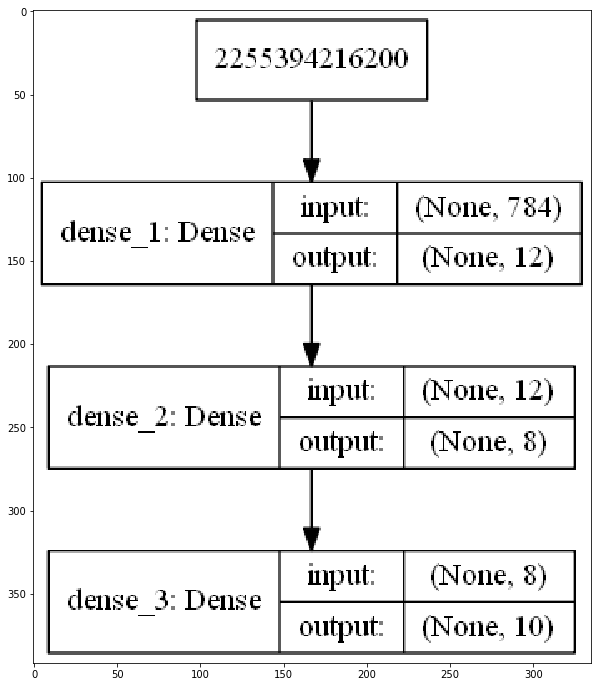

In [46]:
from keras.utils.vis_utils import plot_model
import pydot

plot_model(model, to_file='DigitRecognitionWithANN.png', show_shapes=True, show_layer_names=True)

# Python program to read  
# image using matplotlib 
  
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('DigitRecognitionWithANN.png') 

# increasing the size of image
plt.figure(figsize=(10,12))

# Output Images
plt.imshow(img)

# for deleting the png file
import os
try: 
    os.remove("DigitRecognitionWithANN.png")
except: 
    print("Not Removed")

It is good to always create a summary and a plot of your neural network model in Keras so that we can:-
1. Confirm layer order. It is easy to add layers in the wrong order with the sequential API or to connect them together incorrectly with the functional API. The graph plot can help you confirm that the model is connected the way you intended.
2. Confirm the output shape of each layer. It is common to have problems when defining the shape of input data for complex networks like convolutional and recurrent neural networks. The summary and plot can help you confirm the input shape to the network is as you intended.
3. Confirm parameters. Some network configurations can use far fewer parameters, such as the use of a TimeDistributed wrapped Dense layer in an Encoder-Decoder recurrent neural network. Reviewing the summary can help spot cases of using far more parameters than expected.

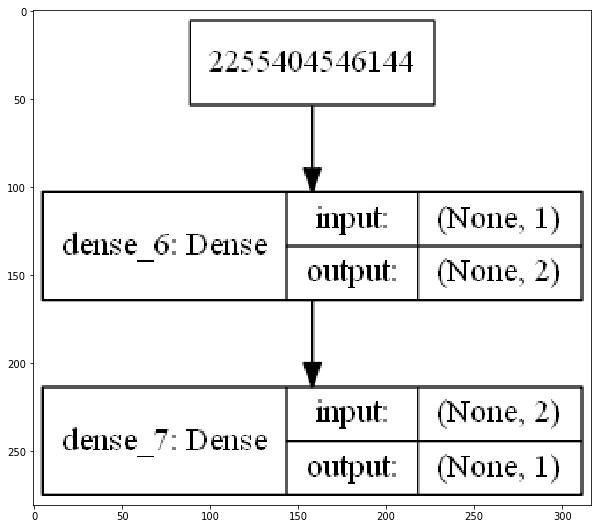

In [47]:
# sample example

model1 = Sequential()
model1.add(Dense(2, input_dim=1, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Read Images 
img = mpimg.imread('model_plot.png') 

# increasing the size of image
plt.figure(figsize=(10,12))

# Output Images
plt.imshow(img)


# for deleting the png file
import os
try: 
    os.remove("model_plot.png")
except: 
    print("Not Removed")